# DB 연결

In [82]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
from dfply import *

In [83]:
import psycopg2

conn = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    password="June3060!!",
    database = "mimic_data",
    port="5432"
)

cursor = conn.cursor()
print("database connected")

database connected


In [84]:
start_time = time.time()

cursor = conn.cursor()
cursor.execute("select * from mimiciv_derived.vitalsign;")
rows = cursor.fetchall()
columns_name = [desc[0] for desc in cursor.description]
vitalsign = pd.DataFrame(rows, columns=columns_name)

end_time = time.time()
wait_time = end_time - start_time
print("경과 시간 : ", wait_time)

경과 시간 :  31.346261739730835


In [85]:
vitalsign

,subject_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,temperature,temperature_site,spo2,glucose
0,10000032,39553978,2180-07-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.06,Oral,NaN,NaN
1,10000032,39553978,2180-07-23 14:11:00,NaN,84.0,48.0,56.0,84.0,48.0,56.0,NaN,None,None,NaN,NaN
2,10000032,39553978,2180-07-23 14:12:00,91.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,None,None,NaN,NaN
3,10000032,39553978,2180-07-23 14:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,98.0,NaN
4,10000032,39553978,2180-07-23 14:30:00,93.0,95.0,59.0,67.0,95.0,59.0,67.0,21.0,None,None,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745495,19999987,36195440,2145-11-04 19:31:00,NaN,163.0,120.0,131.0,163.0,120.0,131.0,NaN,None,None,NaN,NaN
9745496,19999987,36195440,2145-11-04 19:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,100.0,NaN
9745497,19999987,36195440,2145-11-04 20:00:00,92.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,37.83,Oral,100.0,NaN
9745498,19999987,36195440,2145-11-04 21:00:00,87.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.00,Oral,98.0,NaN


In [103]:
subjectlist1 = pd.read_csv('../Data/subjectlist1_edit.csv', parse_dates=['admittime','intubationtime','dischtime', 'deathtime','extubationtime','reintubation_eventtime'])
sub1list = subjectlist1 >> select('subject_id','hadm_id','stay_id')
sub1list = sub1list.drop_duplicates(subset='stay_id')   # remove dup
sub1list

,subject_id,hadm_id,stay_id
0,10001884,26184834,37510196
1,10003400,23559586,38383343
2,10004401,27939719,31202136
3,10004401,29988601,32773003
5,10005817,28661809,31316840
...,...,...,...
8995,19995595,21784060,34670930
8997,19997367,20617667,35616526
9000,19999068,21606769,30143796
9001,19999442,26785317,32336619


## sublist에 해당하는 vitalsign 데이터 추출

In [104]:
# 2,267,699 행

sub1_vitals = sub1list >> left_join(vitalsign, by=["subject_id", "stay_id"])
sub1_vitals

,subject_id,hadm_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,temperature,temperature_site,spo2,glucose
0,10001884,26184834,37510196,2131-01-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,None,None,NaN,NaN
1,10001884,26184834,37510196,2131-01-11 04:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,None,None,100.0,NaN
2,10001884,26184834,37510196,2131-01-11 04:22:00,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
3,10001884,26184834,37510196,2131-01-11 04:25:00,NaN,180.0,12.0,46.0,180.0,12.0,46.0,NaN,None,None,NaN,NaN
4,10001884,26184834,37510196,2131-01-11 05:00:00,60.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,None,None,98.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267694,19999840,21033226,38978960,2164-09-17 13:17:00,NaN,NaN,NaN,44.0,NaN,NaN,44.0,NaN,None,None,NaN,NaN
2267695,19999840,21033226,38978960,2164-09-17 13:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,139.0
2267696,19999840,21033226,38978960,2164-09-17 13:20:00,74.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,None,None,NaN,NaN
2267697,19999840,21033226,38978960,2164-09-17 13:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,275.0


In [105]:
sub1_vitals.sort_values(by=["subject_id", "hadm_id", "stay_id", "charttime"], inplace=True)

In [106]:
sub1_vitals.head()

,subject_id,hadm_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,temperature,temperature_site,spo2,glucose
0,10001884,26184834,37510196,2131-01-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,None,None,NaN,NaN
1,10001884,26184834,37510196,2131-01-11 04:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,None,None,100.0,NaN
2,10001884,26184834,37510196,2131-01-11 04:22:00,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
3,10001884,26184834,37510196,2131-01-11 04:25:00,NaN,180.0,12.0,46.0,180.0,12.0,46.0,NaN,None,None,NaN,NaN
4,10001884,26184834,37510196,2131-01-11 05:00:00,60.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,None,None,98.0,NaN


## bp값이 300 이상인 데이터 제거

In [129]:
columns = ["sbp","dbp","mbp","sbp_ni","dbp_ni","mbp_ni"]
over300_index_list = []
for i, column in enumerate(columns): 
    over_300_index = sub1_vitals[sub1_vitals[column] >= 300].index.to_list()
    over_300_count = len(over_300_index)
    print(f"{column}에 존재하는 300 이상의 값 : {over_300_count}개")
    print("-"*35)
    over300_index_list += over_300_index
    
over300_index_list = set(over300_index_list)

print(f"Subjectlist1 기준, Vital Sign에 존재하는 300이상의 값 : 총 {len(over300_index_list)}개")

sbp에 존재하는 300 이상의 값 : 16개
-----------------------------------
dbp에 존재하는 300 이상의 값 : 0개
-----------------------------------
mbp에 존재하는 300 이상의 값 : 0개
-----------------------------------
sbp_ni에 존재하는 300 이상의 값 : 2개
-----------------------------------
dbp_ni에 존재하는 300 이상의 값 : 0개
-----------------------------------
mbp_ni에 존재하는 300 이상의 값 : 0개
-----------------------------------
Subjectlist1 기준, Vital Sign에 존재하는 300이상의 값 : 총 17개


In [130]:
over300_index_list

{461917,
 582995,
 988305,
 1005315,
 1138533,
 1210064,
 1210065,
 1254718,
 1326680,
 1330376,
 1403400,
 1445485,
 1477105,
 1762105,
 1769836,
 2021064,
 2169723}

In [131]:
sub1_vitals.drop(index=over300_index_list, inplace=True)

In [132]:
sub1_vitals

,subject_id,hadm_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,temperature,temperature_site,spo2,glucose
0,10001884,26184834,37510196,2131-01-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,None,None,NaN,NaN
1,10001884,26184834,37510196,2131-01-11 04:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,None,None,100.0,NaN
2,10001884,26184834,37510196,2131-01-11 04:22:00,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
3,10001884,26184834,37510196,2131-01-11 04:25:00,NaN,180.0,12.0,46.0,180.0,12.0,46.0,NaN,None,None,NaN,NaN
4,10001884,26184834,37510196,2131-01-11 05:00:00,60.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,None,None,98.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267694,19999840,21033226,38978960,2164-09-17 13:17:00,NaN,NaN,NaN,44.0,NaN,NaN,44.0,NaN,None,None,NaN,NaN
2267695,19999840,21033226,38978960,2164-09-17 13:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,139.0
2267696,19999840,21033226,38978960,2164-09-17 13:20:00,74.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,None,None,NaN,NaN
2267697,19999840,21033226,38978960,2164-09-17 13:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,275.0


## 최대 및 최소값 등의 통계 수치 확인

In [162]:
columns = ["sbp","sbp_ni", "dbp", "dbp_ni", "mbp", "mbp_ni"]

for idx, column in enumerate(columns):
    max_num = sub1_vitals[column].max()
    min_num = sub1_vitals[column].min()
    mean_num = sub1_vitals[column].mean()
    median_num = sub1_vitals[column].median()
    std_num = sub1_vitals[column].std()

    print(f"{column} --> min : {round(min_num, 2)}, max : {max_num}, std : {round(std_num, 2)}, mean : {round(mean_num, 2)}, median : {round(median_num, 2)}")
    print("-"*70)

sbp --> min : 1.0, max : 293.0, std : 23.13, mean : 119.26, median : 117.0
----------------------------------------------------------------------
sbp_ni --> min : 2.11, max : 267.0, std : 22.43, mean : 119.38, median : 117.0
----------------------------------------------------------------------
dbp --> min : 1.0, max : 275.0, std : 14.84, mean : 61.19, median : 59.0
----------------------------------------------------------------------
dbp_ni --> min : 4.0, max : 242.0, std : 15.62, mean : 63.84, median : 62.0
----------------------------------------------------------------------
mbp --> min : 1.0, max : 299.0, std : 16.56, mean : 78.12, median : 76.0
----------------------------------------------------------------------
mbp_ni --> min : 2.0, max : 252.0, std : 15.8, mean : 77.41, median : 76.0
----------------------------------------------------------------------


## bp 데이터 분포 확인

In [146]:
cols = ["subject_id", "hadm_id","stay_id", "sbp","dbp","mbp","sbp_ni","dbp_ni","mbp_ni"]

In [147]:
sub2_vitals = sub1_vitals[cols]

In [148]:
sub2_vitals.head(5)

,subject_id,hadm_id,stay_id,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni
0,10001884,26184834,37510196,NaN,NaN,NaN,NaN,NaN,NaN
1,10001884,26184834,37510196,NaN,NaN,NaN,NaN,NaN,NaN
2,10001884,26184834,37510196,NaN,NaN,NaN,NaN,NaN,NaN
3,10001884,26184834,37510196,180.0,12.0,46.0,180.0,12.0,46.0
4,10001884,26184834,37510196,NaN,NaN,NaN,NaN,NaN,NaN


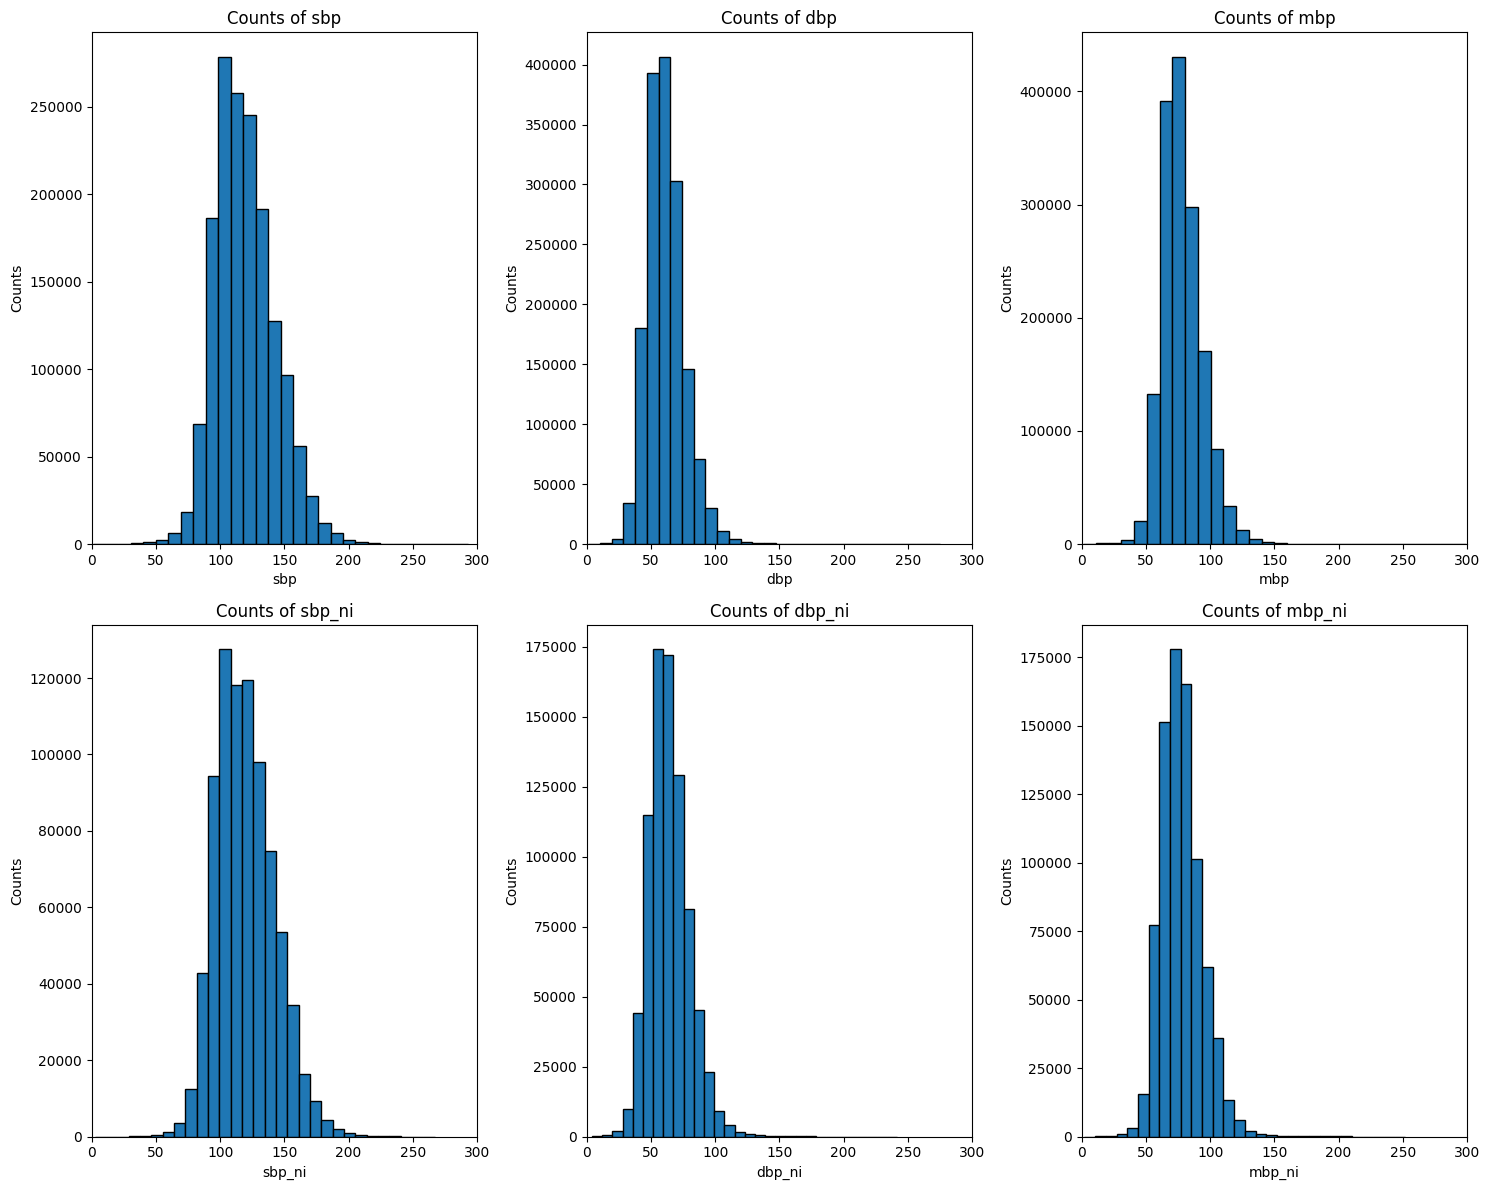

In [149]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

columns = ["sbp","dbp","mbp","sbp_ni","dbp_ni","mbp_ni"]

fig, axes = plt.subplots(2, 3, figsize=(15,12))

axes = axes.flatten()
for i, column in enumerate(columns):
    ax = axes[i]
    sub2_vitals[column].hist(ax=ax, bins=30, edgecolor="black")
    ax.set_title(f"Counts of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Counts")
    ax.grid(False)
    ax.set_xlim([0, 300])

plt.tight_layout()
plt.show()


----

## vitalsign 내에는 존재하지 않는 manual bp 데이터 확인

In [165]:
start_time = time.time()

cursor = conn.cursor()
cursor.execute("select * from mimiciv_icu.d_items;")
rows = cursor.fetchall()
columns_name = [desc[0] for desc in cursor.description]
d_items = pd.DataFrame(rows, columns=columns_name)

end_time = time.time()
wait_time = end_time - start_time
print("경과 시간 : ", wait_time)

경과 시간 :  0.020999431610107422


In [167]:
d_items[d_items["label"].str.contains("Manual", case=False)]

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
577,224167,Manual Blood Pressure Systolic Left,Manual BPs L,chartevents,Routine Vital Signs,mmHg,Numeric,NaN,NaN
770,224643,Manual Blood Pressure Diastolic Left,Manual BPd L,chartevents,Routine Vital Signs,mmHg,Numeric,NaN,NaN
2154,227242,Manual Blood Pressure Diastolic Right,Manual BPd R,chartevents,Routine Vital Signs,mmHg,Numeric,NaN,NaN
2155,227243,Manual Blood Pressure Systolic Right,Manual BPs R,chartevents,Routine Vital Signs,mmHg,Numeric,NaN,NaN


In [172]:
start_time = time.time()

cursor = conn.cursor()
cursor.execute("select * from mimiciv_icu.chartevents where itemid in (224167, 224643, 227242, 227243);")
rows = cursor.fetchall()
columns_name = [desc[0] for desc in cursor.description]
manual_bp = pd.DataFrame(rows, columns=columns_name)

end_time = time.time()
wait_time = end_time - start_time
print("경과 시간 : ", wait_time)

경과 시간 :  58.77319955825806


In [177]:
manual_bp

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10002155,28994087,31090461,62411,2130-09-24 07:06:00,2130-09-24 07:06:00,224167,90,90.0,mmHg,0
1,10002155,28994087,31090461,62411,2130-09-24 07:06:00,2130-09-24 07:06:00,224643,35,35.0,mmHg,0
2,10004235,24181354,34100191,24834,2196-02-25 02:21:00,2196-02-25 02:22:00,224167,99,99.0,mmHg,0
3,10004235,24181354,34100191,24834,2196-02-25 02:21:00,2196-02-25 02:22:00,224643,68,68.0,mmHg,0
4,10004235,24181354,34100191,24834,2196-02-25 02:21:00,2196-02-25 02:22:00,227242,67,67.0,mmHg,0
...,...,...,...,...,...,...,...,...,...,...,...
4869,19971226,20146850,39643831,24834,2156-12-17 20:00:00,2156-12-17 22:14:00,227243,106,106.0,mmHg,0
4870,19973083,22962012,33517611,24834,2123-09-22 00:47:00,2123-09-22 00:48:00,227242,78,78.0,mmHg,0
4871,19973083,22962012,33517611,24834,2123-09-22 00:47:00,2123-09-22 00:48:00,227243,153,153.0,mmHg,0
4872,19973083,22962012,33517611,24834,2123-09-22 00:48:00,2123-09-22 00:48:00,224167,154,154.0,mmHg,0


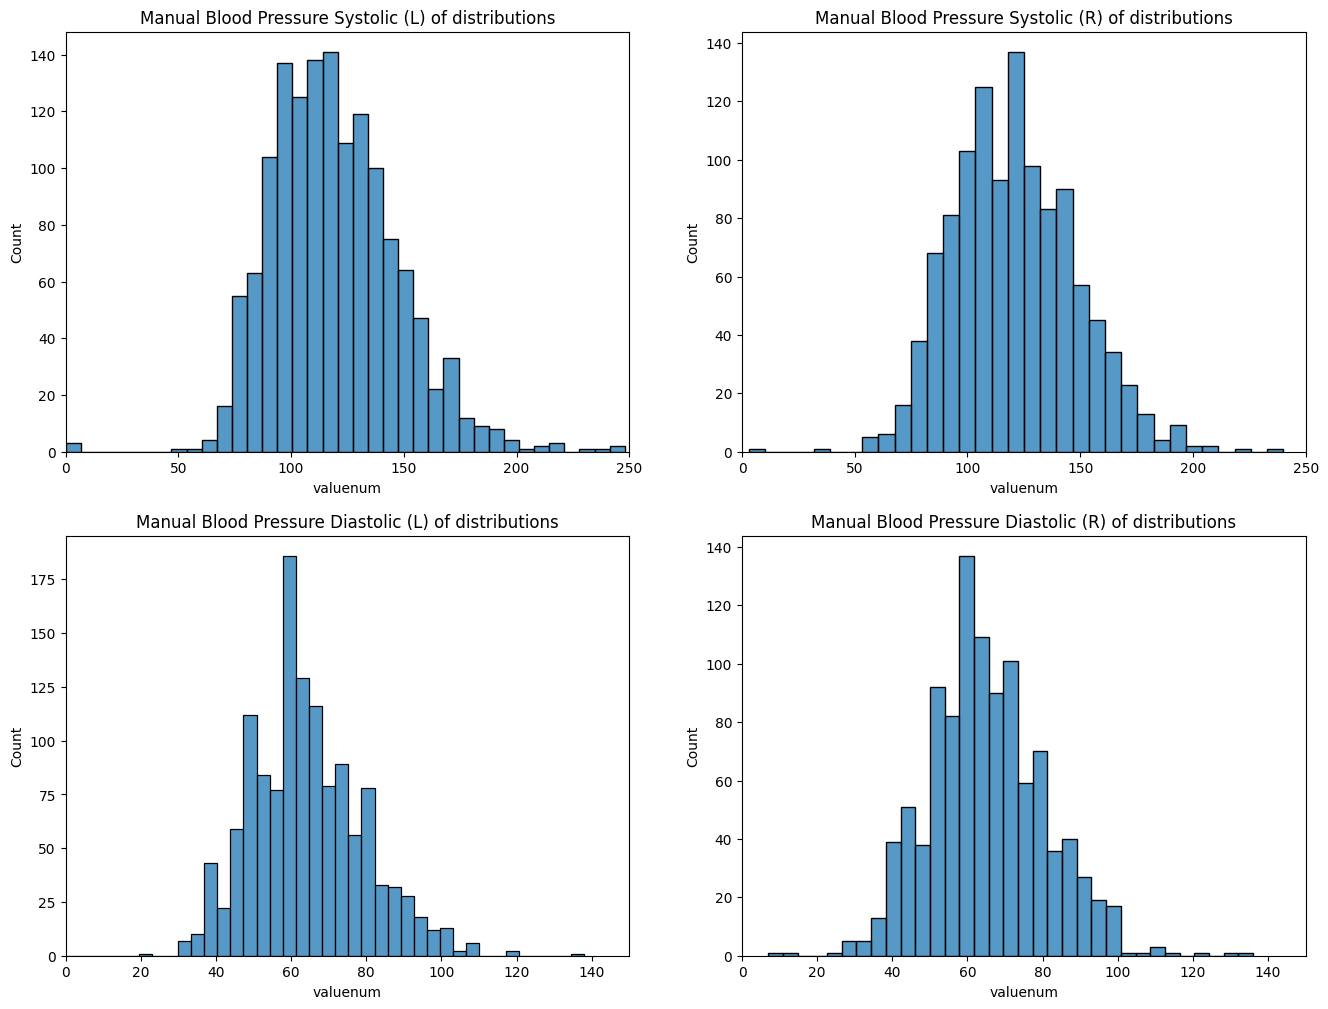

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(2, 2, figsize = (16, 12));
sns.histplot(x='valuenum', data=manual_bp[manual_bp["itemid"] == 224167], ax=ax[0, 0])
ax[0,0].set_title("Manual Blood Pressure Systolic (L) of distributions")
ax[0,0].set_xlim([0, 250])
sns.histplot(x='valuenum', data=manual_bp[manual_bp["itemid"] == 227243], ax=ax[0, 1])
ax[0,1].set_title("Manual Blood Pressure Systolic (R) of distributions")
ax[0,1].set_xlim([0, 250])
sns.histplot(x='valuenum', data=manual_bp[manual_bp["itemid"] == 224643], ax=ax[1, 0])
ax[1,0].set_title("Manual Blood Pressure Diastolic (L) of distributions")
ax[1,0].set_xlim([0, 150])
sns.histplot(x='valuenum', data=manual_bp[manual_bp["itemid"] == 227242], ax=ax[1, 1])
ax[1,1].set_title("Manual Blood Pressure Diastolic (R) of distributions")
ax[1,1].set_xlim([0, 150])
plt.show()